In [46]:
#time series 
import pandas as pd
%matplotlib inline 
from dateutil import parser
import matplotlib.pyplot as plt
from matplotlib import dates
from statsmodels.tsa.filters.hp_filter import hpfilter

In [65]:
date_parser = lambda x: Datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [6]:
#df['Datetime'] = pd.to_datetime(df['Datetime'],format='%Y-%m-%d %H:%M:%S')

In [7]:
df = pd.read_csv('coretemp.csv',index_col='Datetime', parse_dates=True) #dparse_dates=True,index_col='Datetime',date_parser=date_parser 

/var/folders/d4/_hpfqphj071158367x6z8zsr0000gq/T/ipykernel_69912/46135092.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('coretemp.csv',index_col='Datetime', parse_dates=True) #dparse_dates=True,index_col='Datetime',date_parser=date_parser


In [8]:
#df['Datetime'] = df['Datetime'].dt.floor('min')

In [9]:
df.head()

,Unnamed: 0,Hourly_Temp
Datetime,,
2022-01-04 00:00:00,0,20.867
2022-01-04 01:00:00,1,21.000
2022-01-04 02:00:00,2,20.867
2022-01-04 03:00:00,3,20.650
2022-01-04 04:00:00,4,20.400


In [10]:
df.columns

Index(['Unnamed: 0', 'Hourly_Temp'], dtype='object')

In [11]:
df=df.drop(['Unnamed: 0'], axis=1)

In [12]:
df.index

DatetimeIndex(['2022-01-04 00:00:00', '2022-01-04 01:00:00',
               '2022-01-04 02:00:00', '2022-01-04 03:00:00',
               '2022-01-04 04:00:00', '2022-01-04 05:00:00',
               '2022-01-04 06:00:00', '2022-01-04 07:00:00',
               '2022-01-04 08:00:00', '2022-01-04 09:00:00',
               ...
               '2022-10-24 14:00:00', '2022-10-24 15:00:00',
               '2022-10-24 16:00:00', '2022-10-24 17:00:00',
               '2022-10-24 18:00:00', '2022-10-24 19:00:00',
               '2022-10-24 20:00:00', '2022-10-24 21:00:00',
               '2022-10-24 22:00:00', '2022-10-24 23:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=7056, freq=None)

In [13]:
df2=df.resample(rule='W').mean() #weekly ave
df3=df.resample(rule='D').mean() #daily ave

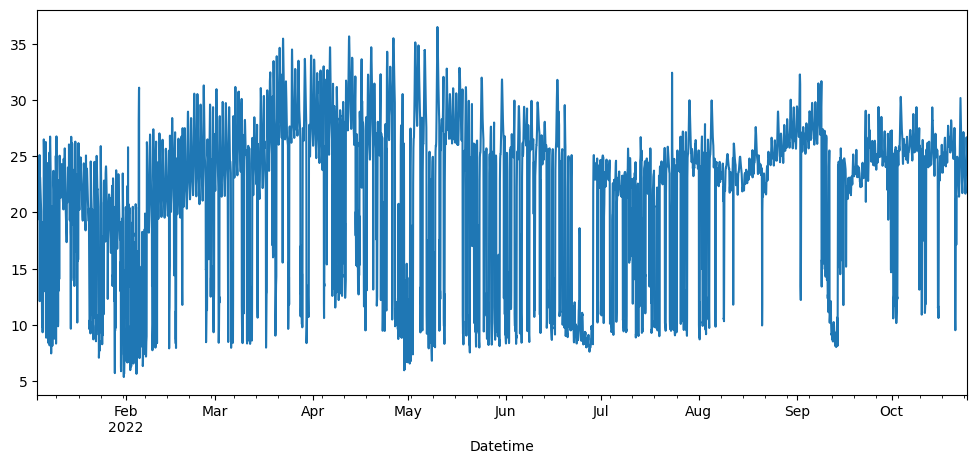

In [14]:
df['Hourly_Temp'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);  #raw

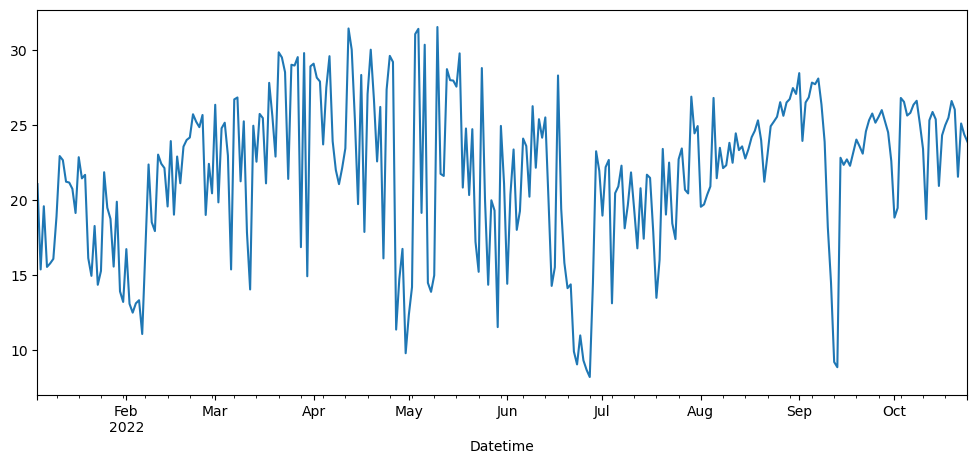

In [27]:
df3['Hourly_Temp'].plot(figsize=(12,5)).autoscale(axis='x',tight=True); #daily

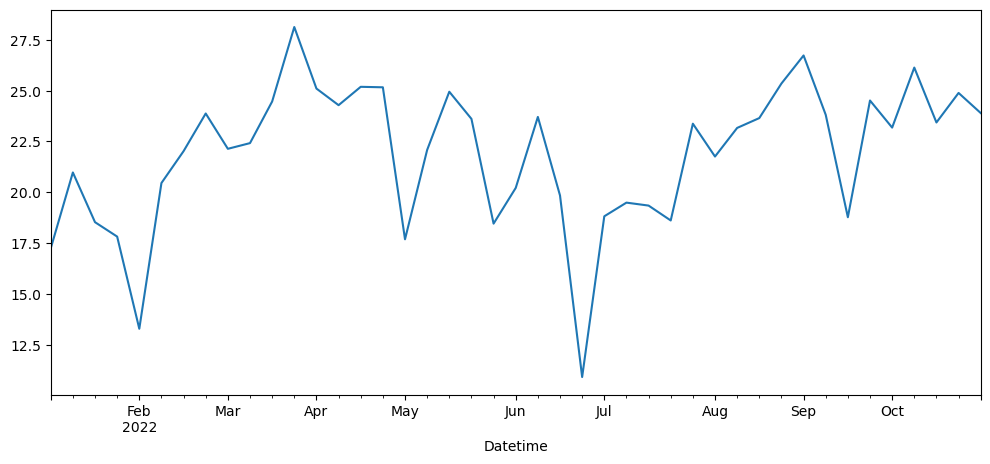

In [28]:
df2['Hourly_Temp'].plot(figsize=(12,5)).autoscale(axis='x',tight=True); #weekly

In [23]:
#create moving average, 6 hour rolling mean
df4=df.rolling(window=8).mean().head(15)
df4

,Hourly_Temp
Datetime,
2022-01-04 00:00:00,NaN
2022-01-04 01:00:00,NaN
2022-01-04 02:00:00,NaN
2022-01-04 03:00:00,NaN
2022-01-04 04:00:00,NaN
2022-01-04 05:00:00,NaN
2022-01-04 06:00:00,NaN
2022-01-04 07:00:00,20.398000
2022-01-04 08:00:00,20.214625


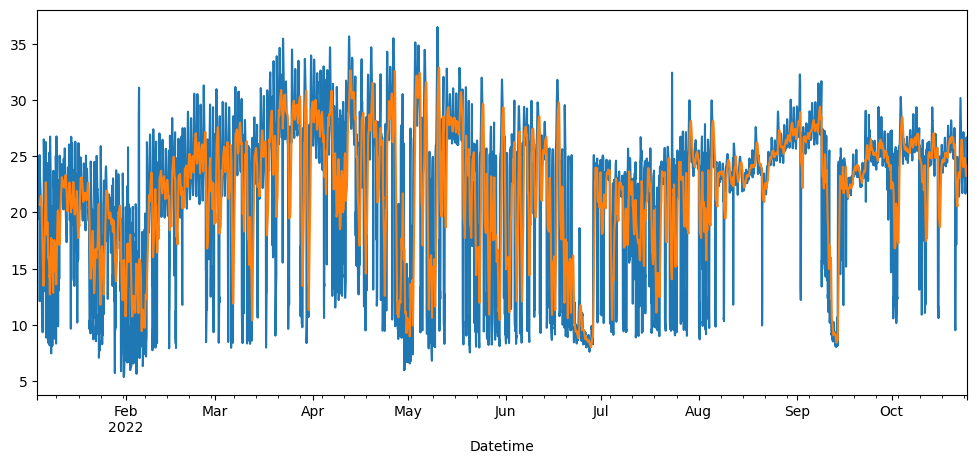

In [25]:
df['Hourly_Temp'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=18).mean()['Hourly_Temp'].plot(); #every 18 hours

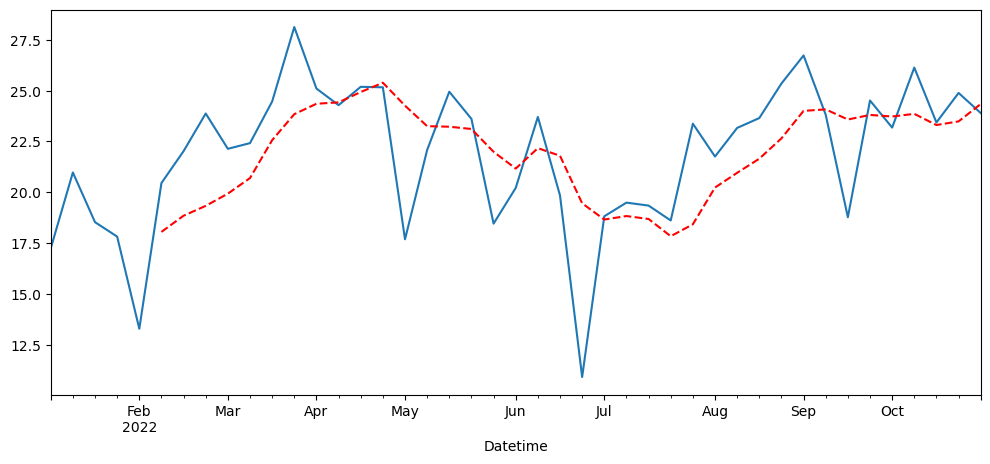

In [38]:
df2['Hourly_Temp'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df2.rolling(window=6).mean()['Hourly_Temp'].plot(ls='--',c='r'); #every 6 weeks  ls='--',c='r'

In [41]:
#hodrick-prescott filter to get the trend 
temp_cycle, temp_trend = hpfilter(df['Hourly_Temp'], lamb=1600)

In [42]:
df['trend'] = temp_trend
df['cycle'] = temp_cycle

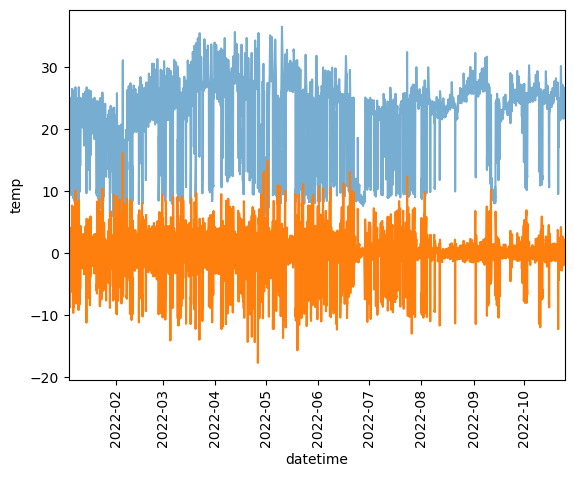

In [57]:
plt.plot(df.index, df['Hourly_Temp'], label='Hourly_Temp', alpha=0.6)
plt.plot(df.index, df['cycle'], label='cycle', alpha=1.0)
plt.autoscale(axis='x',tight=True)
plt.xlabel('datetime')
plt.ylabel('temp')
plt.xticks(rotation=90)
plt.show()